# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
# function to plot the graph
import plotly_express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

def plot_data(df,title,y):
    '''function for plotting gold data'''
    plot = px.line(df, 
                        x="Date", 
                        y=[y], 
                        hover_name="Date",
                        line_shape="linear",
                        title=title) 
    return plot

In [3]:
# yfinance is used to fetch data
import yfinance as yf

***
# Importing Gold Price Data 
***

In [4]:
#df = yf.download('GLD','2008-01-01','2022-10-30')


#create data drame to read data set
df = pd.read_csv('gld_price_data.csv')

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Data set columns


- Date - mm/dd/yyyy
- SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.
- GLD - Gold Price
- USO - United States Oil Fund
- SLV - Silver Price
- EUR/USD - currency pair quotation of the Euro against the US

***
# Data Exploration & Analysis
***

### Plotting the raw data
***

In [6]:
c1 = "SLV"
plot_data(df,'SILVER Price',c1)

### Exploring the raw data
***

In [7]:
c5 = "EUR/USD"
plot_data(df,'Plot of EUR/USD Data',c5)

In [8]:
# checking structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# finding number of rows and column
df.shape

(2290, 6)

In [10]:
# describe df numerical columns
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Finding unwanted collumns
***

In [11]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


We will not consider Date Feature and hence we will drop this feature during feature selection.

In [12]:
#finding the missing values
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Result : We don't have any missing values.

### Finding Features with only one value
***

In [13]:
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


Result : No feature found with only one value.

### Finding Duplicated Data
***

In [14]:
df.duplicated().sum()

0

Result : No duplicated data found.

In [15]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['GLD']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()



discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['GOD']]
print("Continuous feature Count {}".format(len(continuous_features)))

Number of numerical variables:  4
Discrete Variables Count: 0
Continuous feature Count 4


Results : 
- There are 4 numerical features
- There are 0 Discrete Variables in give dataset
- There are 4 continuous numerical features


### Distribution of Continuous Numerical Features
***

/Users/79_satya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/79_satya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/79_satya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histog

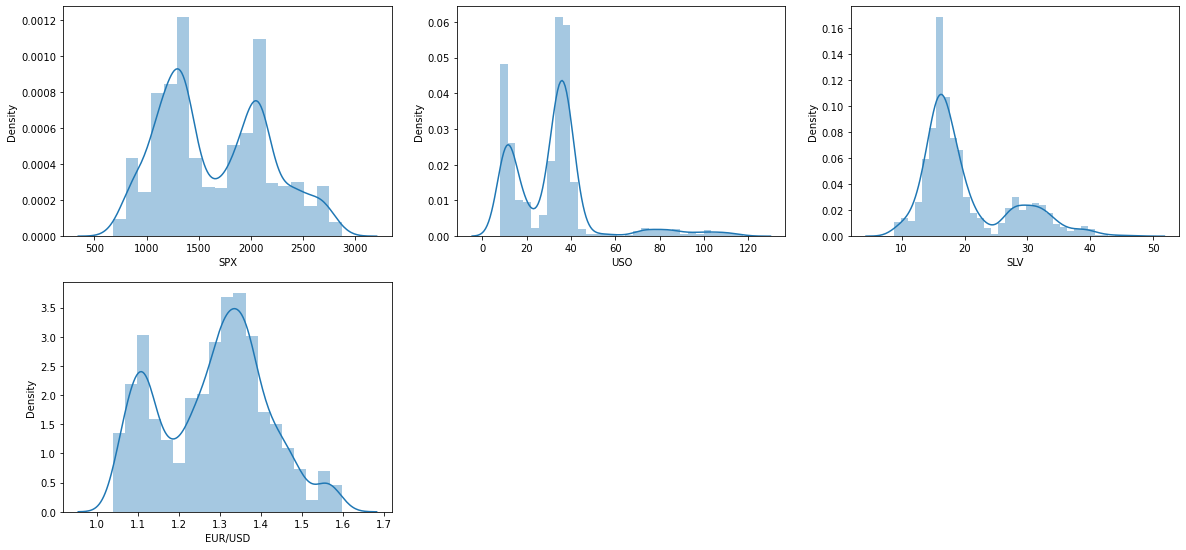

In [16]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Results : 
- USO heavily skewed towards right and seems to be have some outliers.
- It seems like the rest are distributed normally.

### Relation between Continous numerical Features and Labels
***

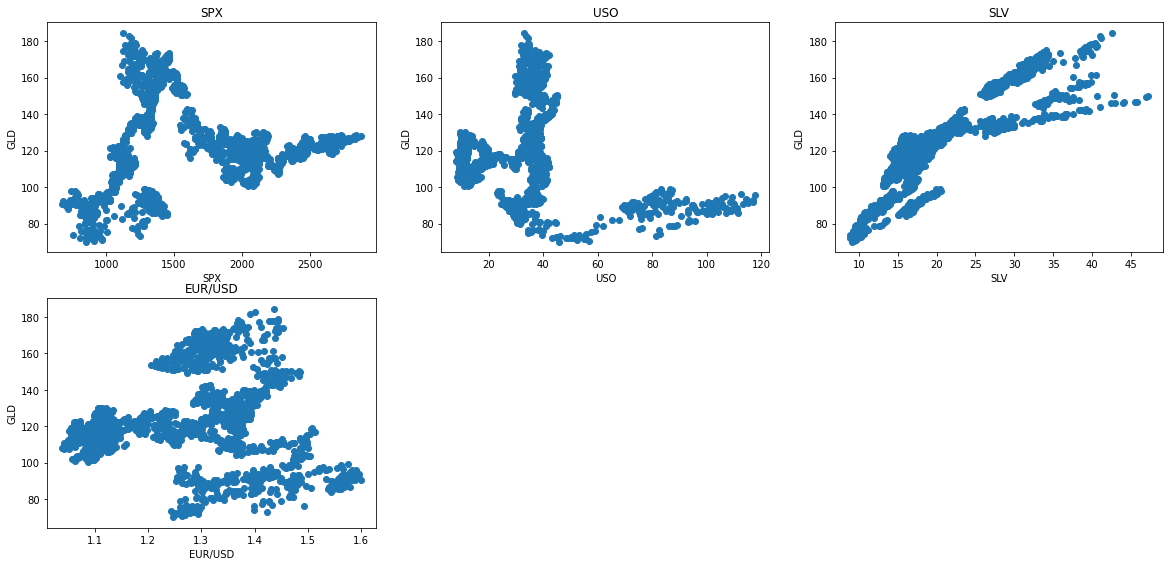

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

Result : It seems like SLV is passing linearly with Gold

### Finding Data Outliners 
***

/Users/79_satya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/79_satya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/79_satya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/79_satya/opt/anaconda3/l

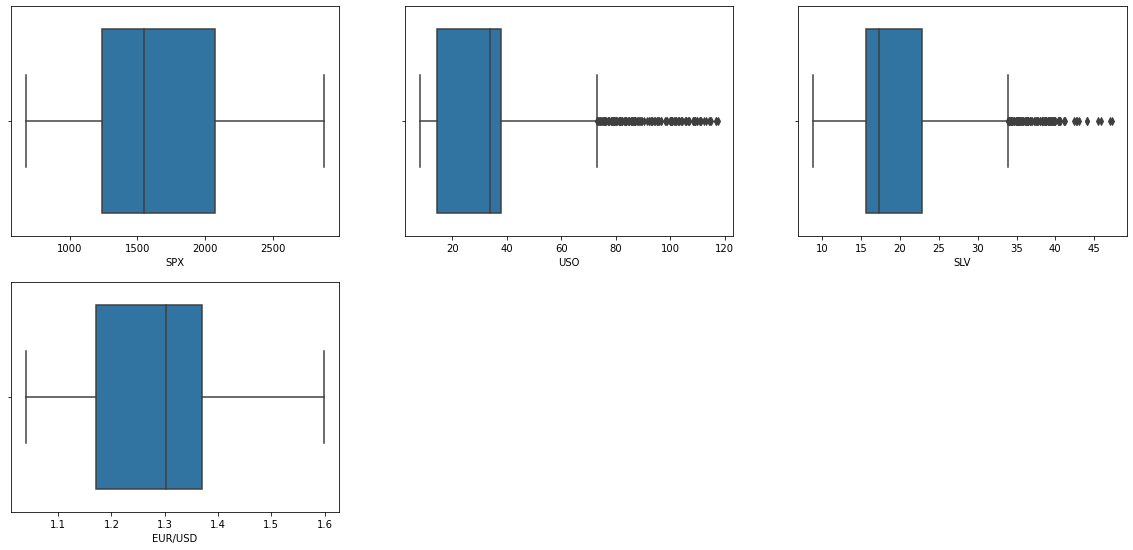

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Results : 

- It seems like USO and SLV have some outliners

### Explore the Correlation between numerical features

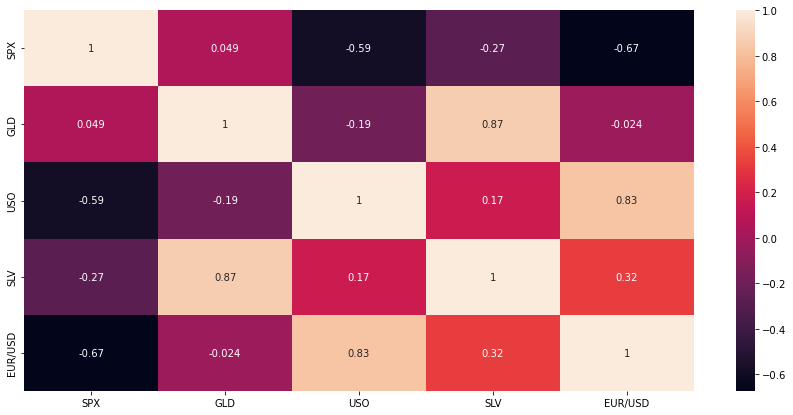

In [19]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [20]:
print (cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



Result : It seems SLV feature is heavily correlated with GLD

***
# Data Preprocessing
***

In [21]:
data_preprocessed = df.copy()

In [22]:
data_preprocessed.isnull().mean() * 100

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

### Dropping the date collumn
***

In [23]:
data_preprocessed['Date'] = pd.to_datetime(data_preprocessed['Date'])

In [24]:
date_columns = ['Date']
num_columns = data_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'GLD'

In [25]:
num_columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [26]:
data_preprocessed.reset_index(drop=True, inplace=True)

In [27]:
data_preprocessed.drop(['Date'], axis=1, inplace=True)

### Spliting data into Train and Test Sets
***

In [28]:
## train test split

X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

### Visually inspecting the Train and test data
***

In [29]:
len(X_train)

1832

In [30]:
len(X_test)

458

In [31]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [32]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

<AxesSubplot:>

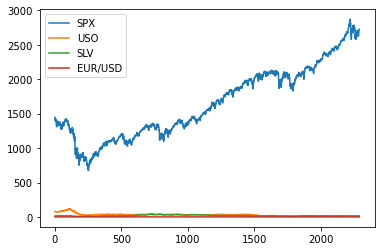

In [33]:
X.plot()

<AxesSubplot:>

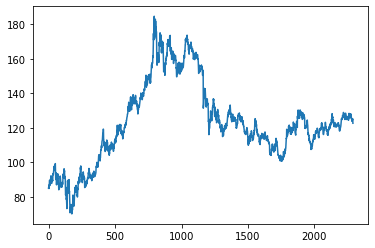

In [34]:
Y.plot()

### Normalisation using MinMax Scaling
***

In [35]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature selection using SelectKBest
***

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(k=3)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

***
# Model Selection
***

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Creating the model for each regression technique
***

In [38]:
lr = LinearRegression().fit(X_train_scaled, y_train)
y_lr = lr.predict(X_test_scaled)

In [39]:
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)
y_knn = knn.predict(X_test_scaled)

In [40]:
dt = DecisionTreeRegressor().fit(X_train_scaled, y_train)
y_dt = dt.predict(X_test_scaled)

In [41]:
br = BayesianRidge().fit(X_train_scaled,y_train)
y_br = br.predict(X_test_scaled)

In [42]:
en = ElasticNet().fit(X_train_scaled,y_train)
y_en = en.predict(X_test_scaled)

In [43]:
gb = GradientBoostingRegressor().fit(X_train_scaled,y_train)
y_gb = gb.predict(X_test_scaled)

In [44]:
hr = HuberRegressor().fit(X_train_scaled,y_train)
y_hr = hr.predict(X_test_scaled)

In [45]:
svr = SVR().fit(X_train_scaled,y_train)
y_svr = svr.predict(X_test_scaled)

In [46]:
rf = RandomForestRegressor().fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)

In [47]:
et = ExtraTreesRegressor().fit(X_train_scaled,y_train)
y_et = et.predict(X_test_scaled)

### Model Evaluation
***

#### R2 Score
Higher R2 Score is better

In [48]:
lr_score = metrics.r2_score(y_test, y_lr)
knn_score = metrics.r2_score(y_test, y_knn)
dt_score = metrics.r2_score(y_test, y_dt)
br_score = metrics.r2_score(y_test, y_br)
en_score = metrics.r2_score(y_test, y_en)
gb_score = metrics.r2_score(y_test, y_gb)
hr_score = metrics.r2_score(y_test, y_hr)
svr_score = metrics.r2_score(y_test, y_svr)
rf_score = metrics.r2_score(y_test, y_rf)
et_score = metrics.r2_score(y_test, y_et)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*20, "R2 Score", "*"*20)

print("-"*50)
print("| Linear Regression: ", lr_score)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", knn_score)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", dt_score)
print("-"*50)

print("-"*50)
print("| Bayesian Ridge: ", br_score)
print("-"*50)

print("-"*50)
print("| Elastic Net: ", en_score)
print("-"*50)

print("-"*50)
print("| Gradient Boosting: ", gb_score)
print("-"*50)

print("-"*50)
print("| Huber: ", hr_score)
print("-"*50)

print("-"*50)
print("| Support Vector Machine: ", svr_score)
print("-"*50)

print("-"*50)
print("| Random Forest: ", rf_score)
print("-"*50)

print("-"*50)
print("| Extra Tree: ", et_score)
print("-"*50)

******************** R2 Score ********************
--------------------------------------------------
| Linear Regression:  0.8969155673669311
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  0.9886213810048285
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  0.9640886277050201
--------------------------------------------------
--------------------------------------------------
| Bayesian Ridge:  0.8968993982916906
--------------------------------------------------
--------------------------------------------------
| Elastic Net:  0.08036680691078579
--------------------------------------------------
--------------------------------------------------
| Gradient Boosting:  0.9703628591226864
--------------------------------------------------
--------------------------------------------------
| Huber:  0.8812285152187818
----------------------

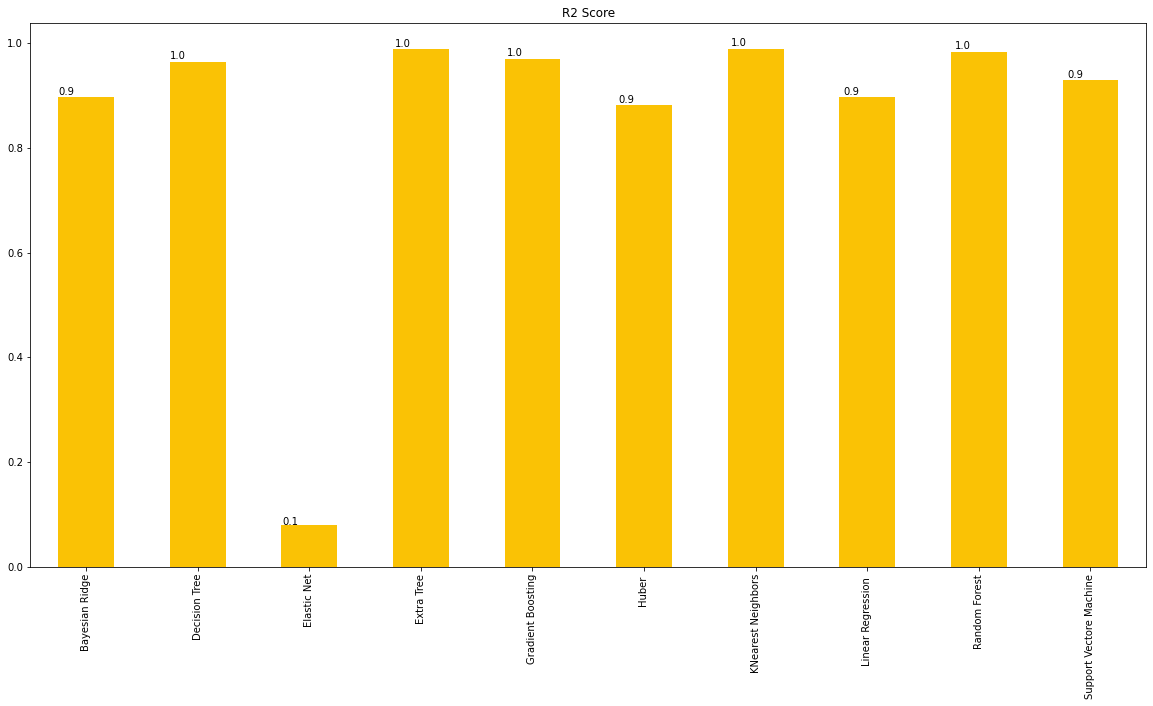

In [57]:
metric_val = {
    "R2 score": {
    "Linear Regression ": lr_score,
    "KNearest Neighbors": knn_score,
    "Decision Tree": dt_score,
    "Bayesian Ridge": br_score,
    "Elastic Net": en_score,
    "Gradient Boosting": gb_score,
    "Huber ": hr_score,
    "Support Vectore Machine": svr_score,
    "Random Forest": rf_score,
    "Extra Tree": et_score
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (20,10), 
                             legend =False, 
                             title = "R2 Score",
                             color = '#FAC205');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Mean Square Error

Lower MSE is better

In [51]:
lr_score_MSE = metrics.mean_squared_error(y_test, y_lr)
knn_score_MSE = metrics.mean_squared_error(y_test, y_knn)
dt_score_MSE = metrics.mean_squared_error(y_test, y_dt)
br_score_MSE = metrics.mean_squared_error(y_test, y_br)
en_score_MSE = metrics.mean_squared_error(y_test, y_en)
gb_score_MSE = metrics.mean_squared_error(y_test, y_gb)
hr_score_MSE = metrics.mean_squared_error(y_test, y_hr)
svr_score_MSE = metrics.mean_squared_error(y_test, y_svr)
rf_score_MSE = metrics.mean_squared_error(y_test, y_rf)
et_score_MSE = metrics.mean_squared_error(y_test, y_et)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*20, "Mean Squared Error", "*"*20)

print("-"*50)
print("| Linear Regression: ", lr_score_MSE)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", knn_score_MSE)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", dt_score_MSE)
print("-"*50)

print("-"*50)
print("| Bayesian Ridge: ", br_score_MSE)
print("-"*50)

print("-"*50)
print("| Elastic Net: ", en_score_MSE)
print("-"*50)

print("-"*50)
print("| Gradient Boosting: ", gb_score_MSE)
print("-"*50)

print("-"*50)
print("| Huber: ", hr_score_MSE)
print("-"*50)

print("-"*50)
print("| Support Vector Machine: ", svr_score_MSE)
print("-"*50)

print("-"*50)
print("| Random Forest: ", rf_score_MSE)
print("-"*50)

print("-"*50)
print("| Extra Tree: ", et_score_MSE)
print("-"*50)

******************** Mean Squared Error ********************
--------------------------------------------------
| Linear Regression:  56.52118365747226
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  6.238895607872545
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  19.690201682550512
--------------------------------------------------
--------------------------------------------------
| Bayesian Ridge:  56.530049159739626
--------------------------------------------------
--------------------------------------------------
| Elastic Net:  504.23478382155474
--------------------------------------------------
--------------------------------------------------
| Gradient Boosting:  16.250041250861496
--------------------------------------------------
--------------------------------------------------
| Huber:  65.12239271360531
----------------

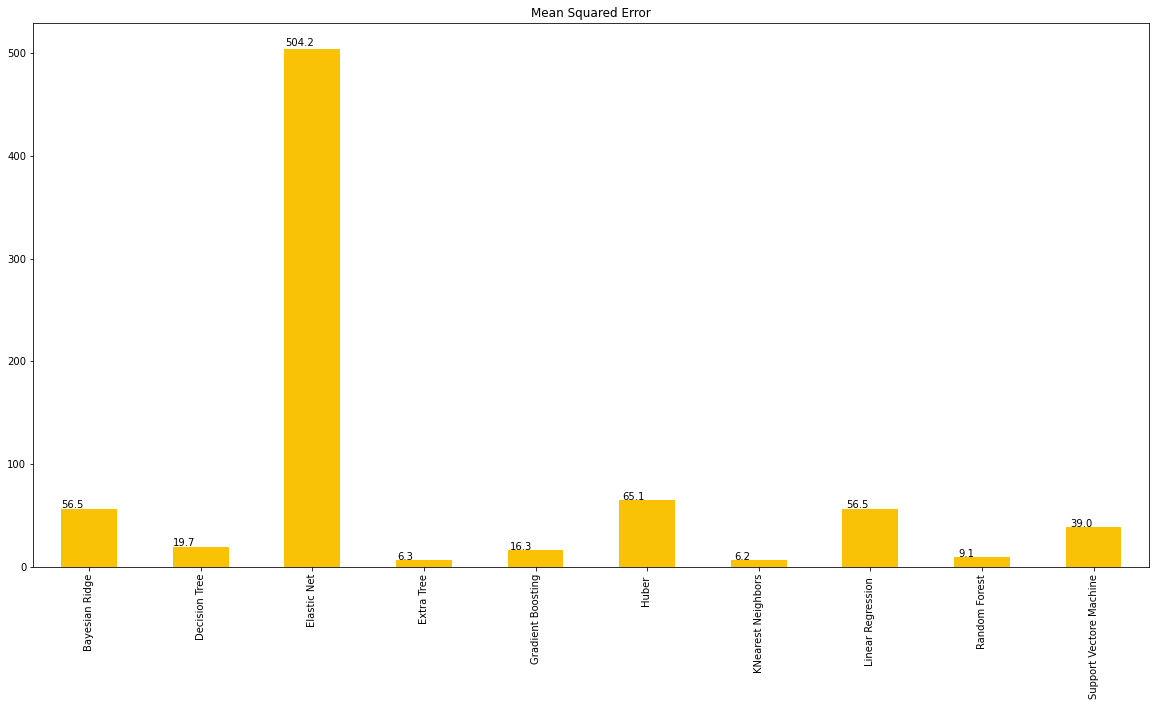

In [53]:
metric_val = {
    "Mean Squared Error": {
    "Linear Regression ": lr_score_MSE,
    "KNearest Neighbors": knn_score_MSE,
    "Decision Tree": dt_score_MSE,
    "Bayesian Ridge": br_score_MSE,
    "Elastic Net": en_score_MSE,
    "Gradient Boosting": gb_score_MSE,
    "Huber ": hr_score_MSE,
    "Support Vectore Machine": svr_score_MSE,
    "Random Forest": rf_score_MSE,
    "Extra Tree": et_score_MSE
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (20,10), 
                             legend =False, 
                             title = "Mean Squared Error",
                             color = '#FAC205');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Mean Absolute Error



Lower MAE is better

In [54]:
lr_score_MAE = metrics.mean_absolute_error(y_test, y_lr)
knn_score_MAE = metrics.mean_absolute_error(y_test, y_knn)
dt_score_MAE = metrics.mean_absolute_error(y_test, y_dt)
br_score_MAE = metrics.mean_absolute_error(y_test, y_br)
en_score_MAE = metrics.mean_absolute_error(y_test, y_en)
gb_score_MAE = metrics.mean_absolute_error(y_test, y_gb)
hr_score_MAE = metrics.mean_absolute_error(y_test, y_hr)
svr_score_MAE = metrics.mean_absolute_error(y_test, y_svr)
rf_score_MAE = metrics.mean_absolute_error(y_test, y_rf)
et_score_MAE = metrics.mean_absolute_error(y_test, y_et)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*20, "Mean Squared Error", "*"*20)

print("-"*50)
print("| Linear Regression: ", lr_score_MAE)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", knn_score_MAE)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", dt_score_MAE)
print("-"*50)

print("-"*50)
print("| Bayesian Ridge: ", br_score_MAE)
print("-"*50)

print("-"*50)
print("| Elastic Net: ", en_score_MAE)
print("-"*50)

print("-"*50)
print("| Gradient Boosting: ", gb_score_MAE)
print("-"*50)

print("-"*50)
print("| Huber: ", hr_score_MSE)
print("-"*50)

print("-"*50)
print("| Support Vector Machine: ", svr_score_MAE)
print("-"*50)

print("-"*50)
print("| Random Forest: ", rf_score_MAE)
print("-"*50)

print("-"*50)
print("| Extra Tree: ", et_score_MAE)
print("-"*50)

******************** Mean Squared Error ********************
--------------------------------------------------
| Linear Regression:  5.599759825271187
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  1.3796944039301322
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  1.8989516310043668
--------------------------------------------------
--------------------------------------------------
| Bayesian Ridge:  5.600753035966268
--------------------------------------------------
--------------------------------------------------
| Elastic Net:  16.940915874599266
--------------------------------------------------
--------------------------------------------------
| Gradient Boosting:  2.6188394414321783
--------------------------------------------------
--------------------------------------------------
| Huber:  65.12239271360531
----------------

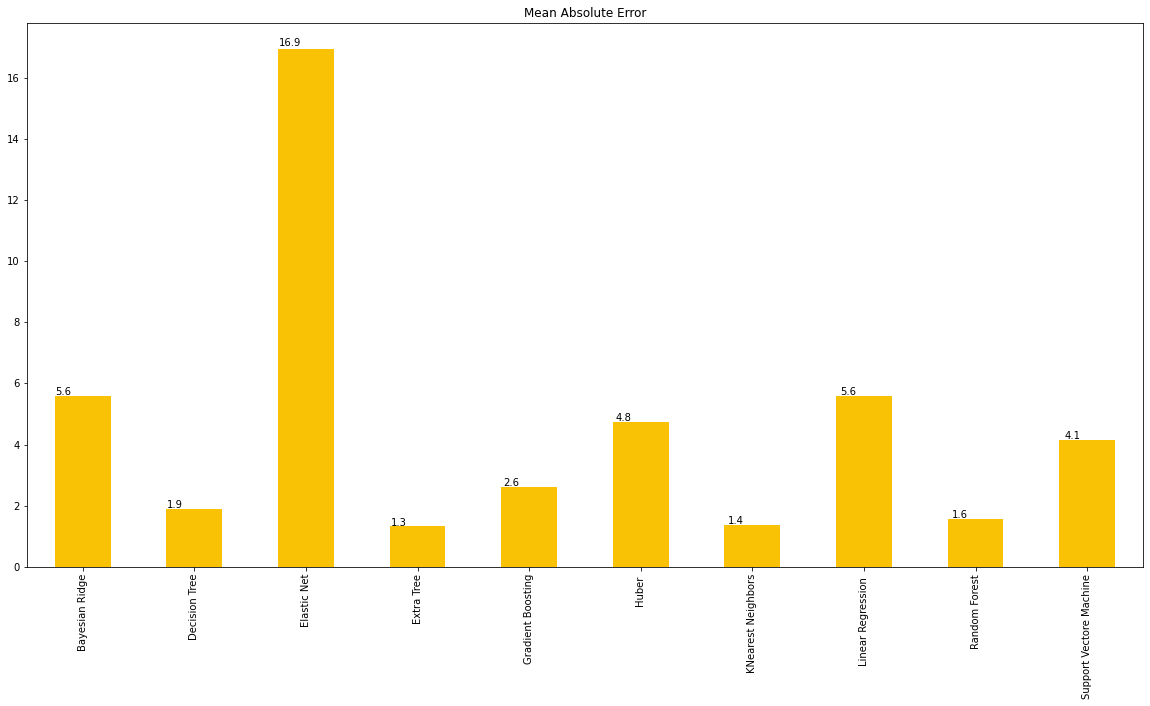

In [56]:
metric_val = {
    "Mean Absolute Error": {
    "Linear Regression ": lr_score_MAE,
    "KNearest Neighbors": knn_score_MAE,
    "Decision Tree": dt_score_MAE,
    "Bayesian Ridge": br_score_MAE,
    "Elastic Net": en_score_MAE,
    "Gradient Boosting": gb_score_MAE,
    "Huber ": hr_score_MAE,
    "Support Vectore Machine": svr_score_MAE,
    "Random Forest": rf_score_MAE,
    "Extra Tree": et_score_MAE
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (20,10), 
                             legend =False, 
                             title = "Mean Absolute Error",
                             color = '#FAC205');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

## Selected Models

After comparing the above graphs we have decided to move ahead with the following models :

1. KNearest Neighbors
2. Random Forest
3. Extra Tree

### KNN

In [73]:
y_knn

array([122.32333367, 128.67666867, 127.94999933,  96.56      ,
       118.160001  , 115.45333333, 125.64333333, 117.443334  ,
       107.596667  ,  98.56999967,  97.100001  , 167.94999667,
       141.870005  , 117.993332  , 171.05000267,  85.373334  ,
       121.693334  , 108.16333   , 113.87333433, 131.01667267,
       125.22666667, 113.32999933, 115.78666667, 108.60666667,
       108.52000167, 126.459999  , 125.66666667, 114.81999967,
       113.323336  , 127.24999733, 148.58666967,  90.90666733,
       157.87666333, 115.46999867, 114.06      , 120.11333433,
       142.33000167, 161.25333633, 173.83333333, 152.71000133,
       117.33999867, 113.87333433, 121.549998  , 114.58666733,
       121.26666767, 107.94      ,  88.219999  , 115.45333333,
       128.67666867, 117.91333533,  99.383334  , 128.67666867,
       107.79333233, 160.31000267, 136.99333733, 116.74000033,
       143.28333533, 131.24000033,  94.866669  , 124.25666833,
       116.12666567,  87.613332  , 104.55666567, 113.44

In [75]:
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

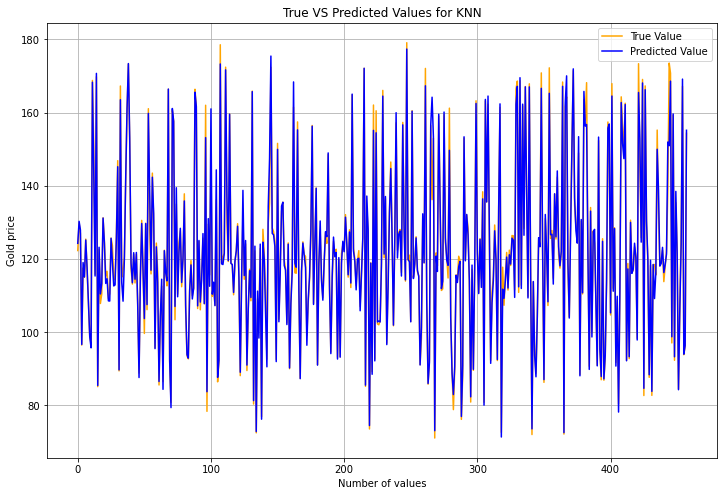

In [76]:
# plot prediction VS original data
y_test = list(y_test)
plt.figure(figsize=(12, 8))
plt.plot(y_test, color = 'orange', label = 'True Value')
plt.plot(y_rf, color = 'blue', label = 'Predicted Value')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Gold price')
plt.title('True VS Predicted Values for KNN')

plt.xlabel('Number of values')


plt.grid()
plt.show();

In [86]:
print ("The Accuracy of KNN model is :", knn_score*100,"%")

The Accuracy of KNN model is : 98.86213810048285 %


### Random Forest

In [64]:
y_rf

array([124.29410083, 130.30330324, 127.91790006,  96.66299689,
       119.03330046, 115.10349946, 125.18890079, 117.69589948,
       108.03130108,  98.7460997 ,  95.73319956, 168.29839733,
       144.03840143, 115.35750105, 170.71490177,  85.45700048,
       123.21429877, 110.4729972 , 113.28770144, 131.20550392,
       124.36769898, 113.33180082, 114.59440186, 108.57819928,
       108.52010215, 125.6684    , 119.00779983, 112.64349918,
       112.91890119, 125.83629878, 145.21440001,  89.71799978,
       163.51369961, 113.61709921, 108.48580067, 119.94210062,
       142.38180281, 161.13280009, 173.39749958, 153.1241007 ,
       118.90890117, 113.52420053, 121.73069838, 114.48449989,
       121.79250043, 107.61719988,  87.62519883, 114.92239929,
       129.70670202, 117.09950109, 103.74030004, 129.68860204,
       107.55689822, 159.78180317, 137.88500139, 116.94519966,
       142.34710195, 132.40280078,  95.51980137, 123.33730064,
       113.59179923,  86.54610149, 104.36639936, 114.47

In [65]:
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

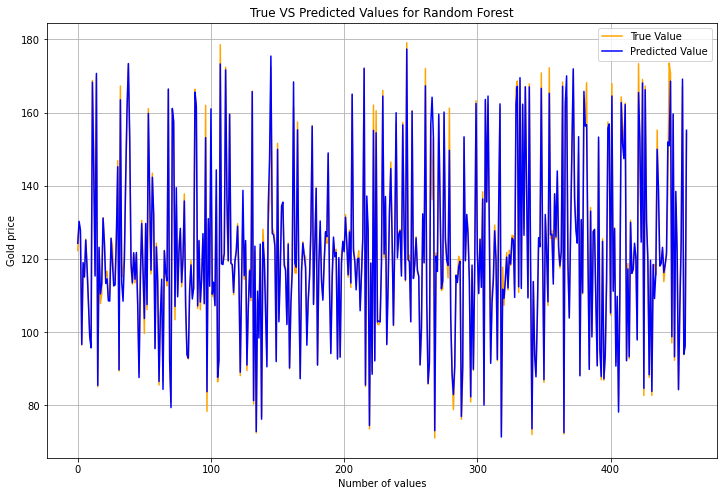

In [63]:
# plot prediction VS original data
y_test = list(y_test)
plt.figure(figsize=(12, 8))
plt.plot(y_test, color = 'orange', label = 'True Value')
plt.plot(y_rf, color = 'blue', label = 'Predicted Value')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Gold price')
plt.title('True VS Predicted Values for Random Forest')

plt.xlabel('Number of values')


plt.grid()
plt.show();

#### Model Accuracy

In [85]:
print ("The Accuracy of the Random Forest model is :",rf_score*100,"%")

The Accuracy of the Random Forest model is : 98.33733204876863 %


### Extra Tree

In [78]:
y_et

array([123.54379998, 129.15620396, 128.70160076,  96.3032964 ,
       117.8226008 , 115.01649894, 125.54100001, 117.65429874,
       108.09050056, 102.11179963,  96.59360074, 168.48839687,
       144.56380228, 116.28120065, 170.87710188,  85.80830183,
       123.11079887, 108.0955968 , 113.20110075, 131.23750414,
       124.73119912, 113.26770048, 114.2234005 , 108.48829895,
       109.50380135, 125.84699901, 124.28859986, 112.48099916,
       112.94090168, 125.35579865, 146.38420375,  89.79759981,
       159.01809968, 113.602399  , 111.40850038, 120.07990083,
       142.53850328, 161.00690057, 173.37489993, 153.02260063,
       118.09680056, 113.86000013, 121.84629812, 114.36419979,
       121.6118005 , 107.57579998,  88.01729868, 114.6693988 ,
       129.32060233, 117.53120113, 102.71740052, 129.25050251,
       107.2798984 , 159.84060296, 138.12810156, 117.58669981,
       143.37820165, 131.01460116,  95.63580129, 123.99180166,
       115.00229912,  86.48350108, 104.68929871, 113.41

In [79]:
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

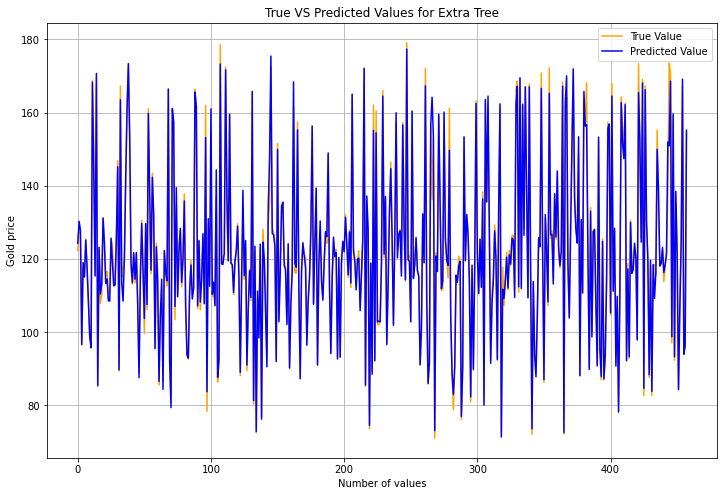

In [80]:
# plot prediction VS original data
y_test = list(y_test)
plt.figure(figsize=(12, 8))
plt.plot(y_test, color = 'orange', label = 'True Value')
plt.plot(y_rf, color = 'blue', label = 'Predicted Value')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Gold price')
plt.title('True VS Predicted Values for Extra Tree')

plt.xlabel('Number of values')


plt.grid()
plt.show();

In [87]:
print ("The Accuracy of Extra Tree model is :",et_score*100,"%")

The Accuracy of Extra Tree model is : 98.85125775577237 %
